In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

$dS_t = \mu S_t dt + \sqrt{v_t}S_t dW^\mathbb{P}_{S,t}$

$dv_t = \kappa(\theta - v_t)dt +\sigma \sqrt{v_t} dW^\mathbb{P}_{v,t}$

### Simulation dependent parameters

In [27]:
S0 = 100
T = 1.0
r = 0.04
N_STEPS = 252
N_SIM = 1

### Heston model dependent parameters

In [28]:
kappa = 3
theta = 0.20**2
v0 = 0.25**2
rho = 0.7
sigma = 0.6

### Euler discretization

$\large dS_{i+1} = S_i e^{(r-\frac{v_i}{2}) \Delta t + \sqrt{v_{i}}\Delta t W^\mathbb{Q}_{S,i+1}}$ 

$\large v_{i+1} = v_i + \kappa(\theta - v_t)\Delta t +\sigma \sqrt{v_i} \Delta t W^\mathbb{Q}_{v,i+1}$

In [29]:
def heston_simulation(
    S0: float,
    v0: float,
    rho: float,
    kappa: float,
    theta: float,
    sigma: float,
    T: float,
    N: float,
    M: float,
):

    dt = T / N
    mu = np.array([0, 0])
    cov = np.array([[1, rho], [rho, 1]])

    S = np.zeros((N + 1, M))
    v = np.zeros((N + 1, M))

    S[0, :] = S0
    v[0, :] = v0

    Z = np.random.multivariate_normal(mu, cov, (N, M))

    for i in range(1, N + 1):

        S[i] = S[i - 1] * np.exp(
            (r - v[i - 1]) * dt + np.sqrt(v[i - 1]) * dt * Z[i - 1, :, 0]
        )
        v[i] = np.maximum(
            v[i - 1]
            + kappa * (theta - v[i - 1]) * dt
            + sigma * np.sqrt(v[i - 1]) * dt * Z[i - 1, :, 1],
            0,
        )

    return S, v

In [30]:
rho_p = 0.98
rho_n = -0.98

S_p, v_p = heston_simulation(S0, v0, rho_p, kappa, theta, sigma, T, N_STEPS, N_SIM)
S_n, v_n = heston_simulation(S0, v0, rho_n, kappa, theta, sigma, T, N_STEPS, N_SIM)

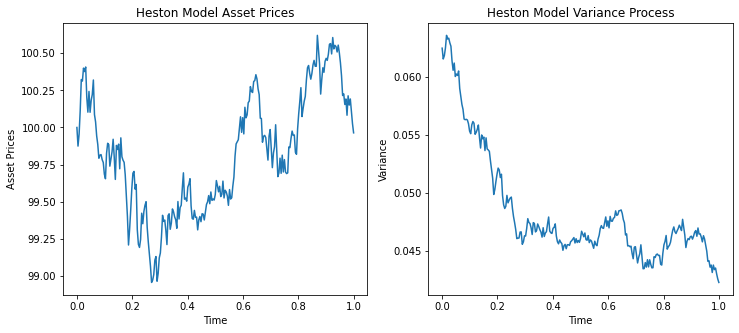

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
time = np.linspace(0, T, N_STEPS + 1)
ax1.plot(time, S_p)
ax1.set_title("Heston Model Asset Prices")
ax1.set_xlabel("Time")
ax1.set_ylabel("Asset Prices")

ax2.plot(time, v_p)
ax2.set_title("Heston Model Variance Process")
ax2.set_xlabel("Time")
ax2.set_ylabel("Variance")

plt.show()

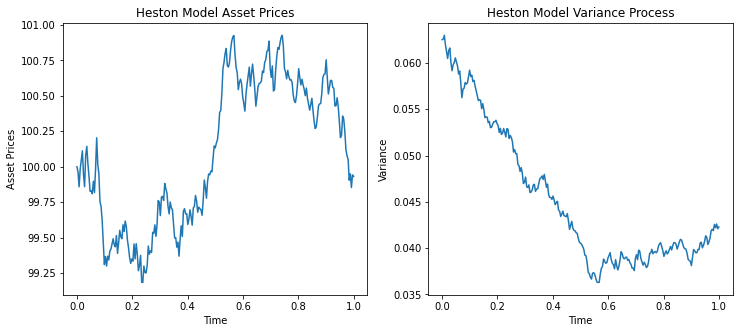

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
time = np.linspace(0, T, N_STEPS + 1)
ax1.plot(time, S_n)
ax1.set_title("Heston Model Asset Prices")
ax1.set_xlabel("Time")
ax1.set_ylabel("Asset Prices")

ax2.plot(time, v_n)
ax2.set_title("Heston Model Variance Process")
ax2.set_xlabel("Time")
ax2.set_ylabel("Variance")

plt.show()